In [70]:
import matplotlib.pyplot as plt
import numpy as np
from sympy import *
from sympy.plotting import plot, plot_parametric
from sympy.functions import exp
import scipy.constants as sc

# Pair-wise potentials

In [71]:
r, r_0, D_e = symbols('r r_0 D_e')

## Lennard-Jones

In [72]:
V_LJ = D_e*((r_0/r)**12-2*(r_0/r)**6)

In [73]:
V_LJ

D_e*(-2*r_0**6/r**6 + r_0**12/r**12)

In [74]:
V_LJ.diff(r)

D_e*(12*r_0**6/r**7 - 12*r_0**12/r**13)

In [75]:
V_LJ.diff(r).diff(r)

D_e*(-84*r_0**6/r**8 + 156*r_0**12/r**14)

In [76]:
# https://doi.org/10.1080/00268979400100494
D_e_Ne2 = 0.34213 #kJ/mol
r_0_Ne2 = 3.10 #Å

In [77]:
V_LJ_Ne2 = D_e_Ne2*((r_0_Ne2/r)**12-2*(r_0_Ne2/r)**6)

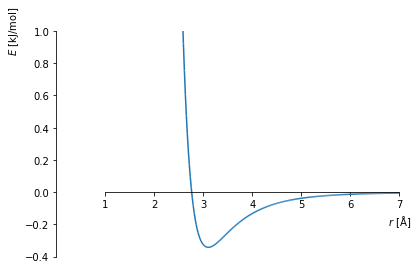

In [78]:
plotLJ = plot(V_LJ_Ne2, xlim=[1,7], ylim=[-0.5,1], 
              adaptive=False, nb_of_points=1000,
              xlabel=r"$r$ [Å]", ylabel=r"$E$ [kJ/mol]", 
             )

## Morse

In [79]:
a = symbols('a')

In [80]:
#V_M = D_e*(1 - exp(-a*(r-r_0)))**2 - D_e
V_M = D_e*(exp(-2*a*(r-r_0))-2*exp(-a*(r-r_0)))

In [81]:
V_M

D_e*(-2*exp(-a*(r - r_0)) + exp(-2*a*(r - r_0)))

In [82]:
V_M.diff(r)

D_e*(2*a*exp(-a*(r - r_0)) - 2*a*exp(-2*a*(r - r_0)))

In [83]:
V_M.diff(r).diff(r)

D_e*(-2*a**2*exp(-a*(r - r_0)) + 4*a**2*exp(-2*a*(r - r_0)))

In [115]:
# https://doi.org/10.1098/rspa.1987.0145
D_e_F2 = 162.7 #kJ/mol
r_0_F2 = 1.41 #Å
a_F2 = 2.97 #1/Å
m_F = 0.018998 #kg/mol

In [139]:
k_F2 = 2*D_e_F2*1000/sc.N_A*(a_F2*10**10)**2
print("k = "+str(round(k_F2))+" kJ/s²")
mu_F2 = m_F**2/(2*m_F)
print("μ = "+str(round(mu_F2,6))+" kg/mol")
vi_F2 = 1/(2*np.pi*sc.c*100)*np.sqrt(k_F2/mu_F2*sc.N_A)
print("v = "+str(round(vi_F2))+" cm⁻¹")
#experimental value 916.64 cm⁻¹

k = 477 kJ/s²
μ = 0.009499 kg/mol
v = 923.0 cm⁻¹


In [103]:
V_M_F2 = D_e_F2*(exp(-2*a_F2*(r-r_0_F2))-2*exp(-a_F2*(r-r_0_F2)))

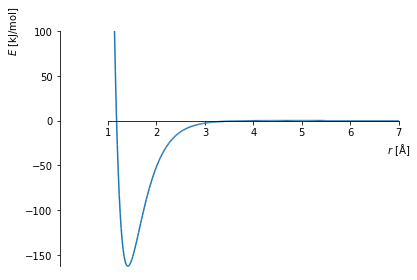

In [104]:
plotM = plot(V_M_F2, xlim=[1,7], ylim=[-170,100], 
              adaptive=False, nb_of_points=1000,
              xlabel=r"$r$ [Å]", ylabel=r"$E$ [kJ/mol]", 
             )

## Coulomb–Pauli

In [246]:
#V_BC = (-l*q**2/r) + b*exp(-a*(r-r_0))
#V_BC = (-l*q**2/r) + (l*q**2/r_0**2/a)*exp(1-a*(r-r_0+1/a))
V_BC = (-l*q**2/r)*(1 - (r/r_0**2/2/a)*exp(-2*a*(r-r_0)))

In [247]:
V_BC

-l*q**2*(1 - r*exp(-2*a*(r - r_0))/(2*a*r_0**2))/r

In [248]:
simplify(V_BC)

-l*q**2/r + l*q**2*exp(-2*a*r + 2*a*r_0)/(2*a*r_0**2)

In [249]:
simplify(V_BC.diff(r).subs(r,r_0))

0

In [250]:
simplify(V_BC.diff(r).diff(r).subs(r,r_0))

2*l*q**2*(a*r_0 - 1)/r_0**3

In [239]:
# https://webbook.nist.gov/cgi/cbook.cgi?ID=C7681494&Mask=1E9F
# https://doi.org/10.1051/0004-6361/201936230
r_0_NaF = 1.926 #Å
IA = 496 - 328 #kJ/mol
D_e_NaF = 478 #kJ/mol
q_NaF = 1 #e
l_NaF = 1389 #kJ/mol·Å
a_NaF = 2.5 #1/Å #NB! empirical value is 2.5
b_NaF = l_NaF*q_NaF**2/r_0_NaF**2/a_NaF
hline = -D_e_NaF + r - r_0_NaF
vline = (r-r_0_NaF)*100000

In [252]:
k_NaF = 2*l_NaF/10**10*1000/(sc.N_A)*q_NaF**2/(r_0_NaF/10**10)**3*(r_0_NaF*a_NaF-1)
print("k = "+str(round(k_NaF))+" kJ/s²")
mu_NaF = 22.99*19.00/(22.99+19.00)/1000
print("μ = "+str(round(mu_NaF,6))+" kg/mol")
vi_NaF = 1/(2*np.pi*sc.c*100)*np.sqrt(k_NaF/mu_NaF*sc.N_A)
print("v = "+str(round(vi_NaF))+" cm⁻¹")
#experimental value 916.64 cm⁻¹

k = 246 kJ/s²
μ = 0.010403 kg/mol
v = 634.0 cm⁻¹


In [253]:
#V_BC_NaF = (-l_NaF*q_NaF**2/r) + b_NaF*exp(1-a_NaF*(r-r_0_NaF+1/a_NaF))+IA
V_BC_NaF = (-l_NaF*q_NaF**2/r)*(1 - (r/r_0_NaF**2/2/a_NaF)*exp(-2*a_NaF*(r-r_0_NaF))) + IA

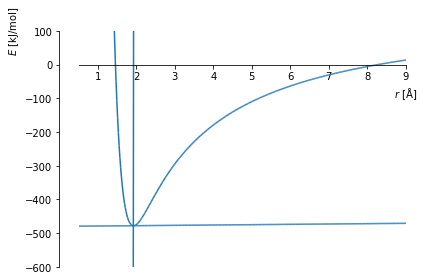

In [254]:
plotBC = plot(V_BC_NaF, hline, vline, xlim=[0.5,9], ylim=[-600,100], 
              adaptive=False, nb_of_points=1000,
              xlabel=r"$r$ [Å]", ylabel=r"$E$ [kJ/mol]", 
             )

## Harmonic oscillator potential

In [255]:
k = symbols('k')

In [256]:
V_HO = 1/2*k*(r-r_0)**2 - D_e

In [257]:
V_HO

-D_e + 0.5*k*(r - r_0)**2

In [258]:
V_HO.diff(r)

0.5*k*(2*r - 2*r_0)

In [259]:
V_HO.diff(r).diff(r)

1.0*k

## Universal potential

In [260]:
V_U = -a*D_e*(r+1/a-r_0)*exp(1-a*(r+1/a-r_0))

In [261]:
simplify(V_U)

-D_e*(a*(r - r_0) + 1)*exp(-a*(r - r_0))

In [262]:
simplify(V_U.diff(r))

D_e*a**2*(r - r_0)*exp(-a*(r - r_0))

In [263]:
V_U.diff(r).diff(r)

-D_e*a**3*(r - r_0 + 1/a)*exp(-a*(r - r_0 + 1/a) + 1) + 2*D_e*a**2*exp(-a*(r - r_0 + 1/a) + 1)

In [274]:
# https://doi.org/10.1139/cjp-2016-0438
# https://webbook.nist.gov/cgi/inchi?ID=C25681792&Mask=1000#Diatomic
r_0_Na2 = 3.08 # Å
D_e_Na2 = 81.7 # kJ/mol
a_Na2 = 1.125

In [275]:
V_U_Na2 = -a_Na2*D_e_Na2*(r+1/a_Na2-r_0_Na2)*exp(1-a_Na2*(r+1/a_Na2-r_0_Na2))

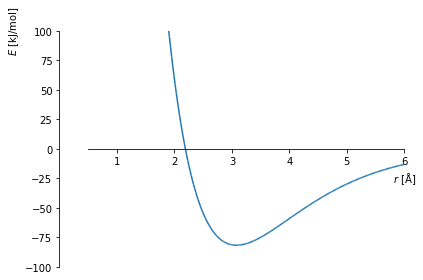

In [276]:
plotU = plot(V_U_Na2, xlim=[0.5,6], ylim=[-100,100], 
             adaptive=False, nb_of_points=1000,
             xlabel=r"$r$ [Å]", ylabel=r"$E$ [kJ/mol]", 
            )

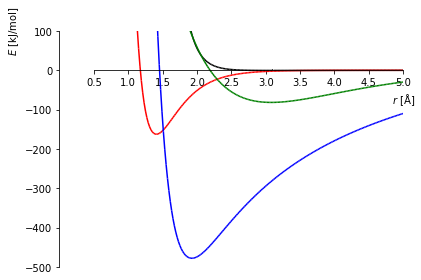

In [277]:
plotAll = plot(V_LJ_Ne2, V_M_F2, V_BC_NaF, V_U_Na2, 
               xlim=[0.5,5], ylim=[-500,100], 
               adaptive=False, nb_of_points=1000,
               xlabel=r"$r$ [Å]", ylabel=r"$E$ [kJ/mol]",
               show=false,
              )
plotAll[0].line_color = 'k'
plotAll[1].line_color = 'r'
plotAll[2].line_color = 'b'
plotAll[3].line_color = 'g'
plotAll.show()